In [1]:
# Kod na podstawie kursu Matthew Renze
# Wczytujemy dane
data(iris)

In [2]:
# Zapoznanie się z formatem danych
head(iris)

Sepal.Length,Sepal.Width,Petal.Length,Petal.Width,Species
5.1,3.5,1.4,0.2,setosa
4.9,3.0,1.4,0.2,setosa
4.7,3.2,1.3,0.2,setosa
4.6,3.1,1.5,0.2,setosa
5.0,3.6,1.4,0.2,setosa
5.4,3.9,1.7,0.4,setosa


In [4]:
library(corrplot)
M <- cor(iris[1:4])
M

ERROR: Error in contrib.url(repos, "source"): trying to use CRAN without setting a mirror


In [5]:
# Rysowanie macierzy korelacji
# dostępne metody "circle", "square", "ellipse", "number", "shade", "color", "pie"
corrplot(M, method = "ellipse")
corrplot(M, method = "pie")
corrplot(M, method = "number")

ERROR: Error in eval(expr, envir, enclos): nie udało się znaleźć funkcji 'corrplot'


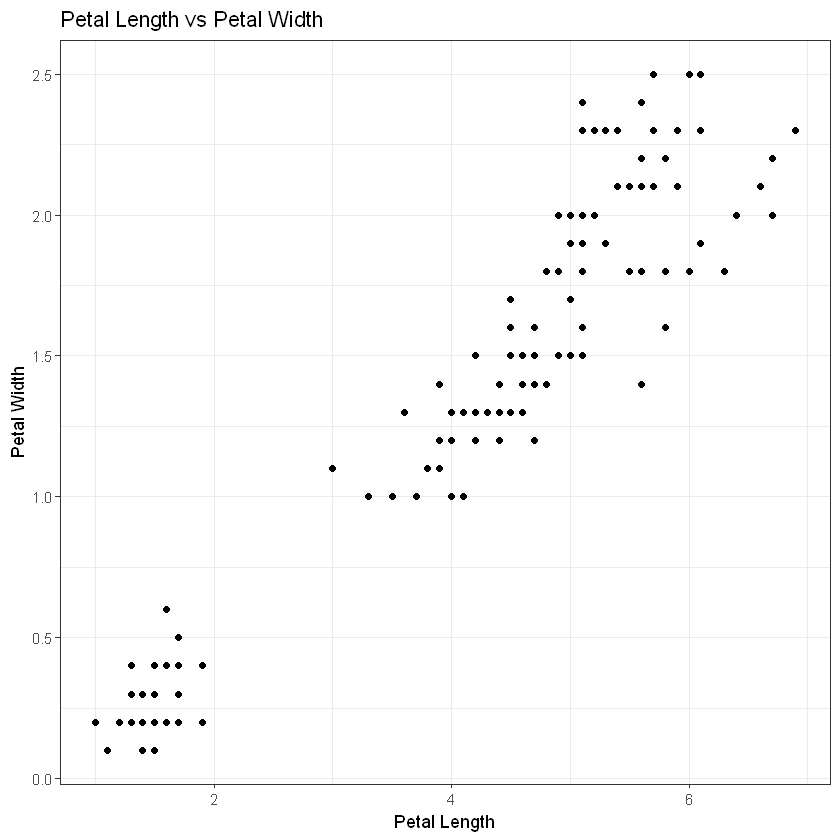

In [6]:
library("RColorBrewer")
library("ggplot2")
color <- brewer.pal(8,"Set2")
wykres <- ggplot() + geom_point(data = iris, aes(x=Petal.Length, y=Petal.Width)) + 
  ggtitle("Petal Length vs Petal Width") + 
  xlab("Petal Length") + ylab("Petal Width") + theme_bw() 
wykres

In [7]:
#Regresja liniowa
model <- lm(formula = Petal.Width ~ Petal.Length, data = iris)


Call:
lm(formula = Petal.Width ~ Petal.Length, data = iris)

Residuals:
     Min       1Q   Median       3Q      Max 
-0.56515 -0.12358 -0.01898  0.13288  0.64272 

Coefficients:
              Estimate Std. Error t value Pr(>|t|)    
(Intercept)  -0.363076   0.039762  -9.131  4.7e-16 ***
Petal.Length  0.415755   0.009582  43.387  < 2e-16 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 0.2065 on 148 degrees of freedom
Multiple R-squared:  0.9271,	Adjusted R-squared:  0.9266 
F-statistic:  1882 on 1 and 148 DF,  p-value: < 2.2e-16


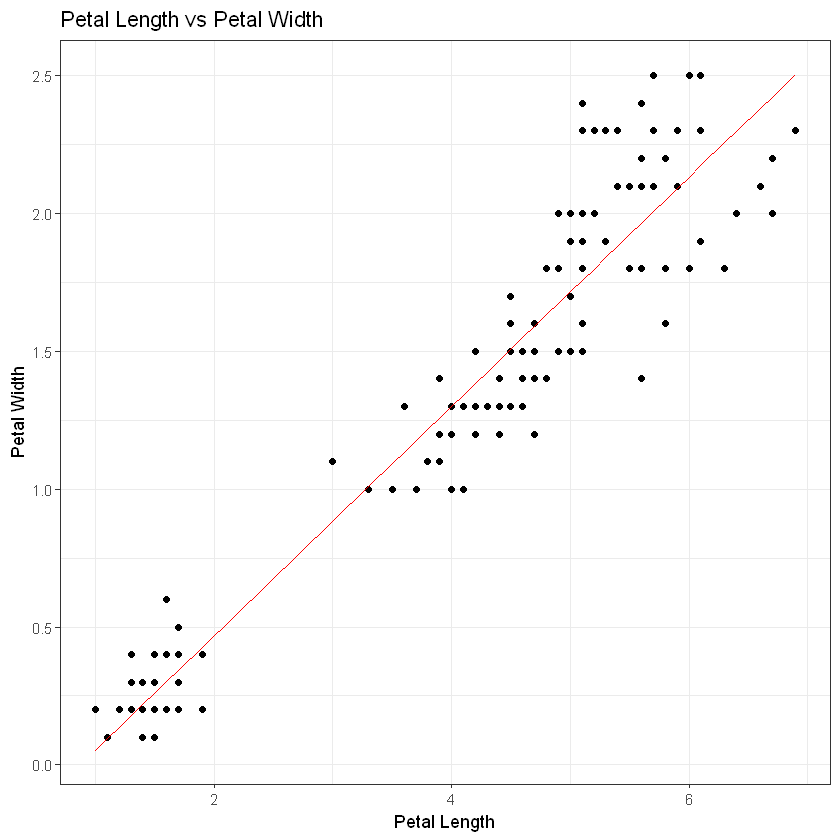

In [8]:
# Podsumowanie i narysowanie modelu
# y = ax+b -> b = Intercept, a = Petal.Length
summary(model)
wykres2 <- wykres +  geom_line(aes(x=iris$Petal.Length, y=model$fitted), col="red")
wykres2

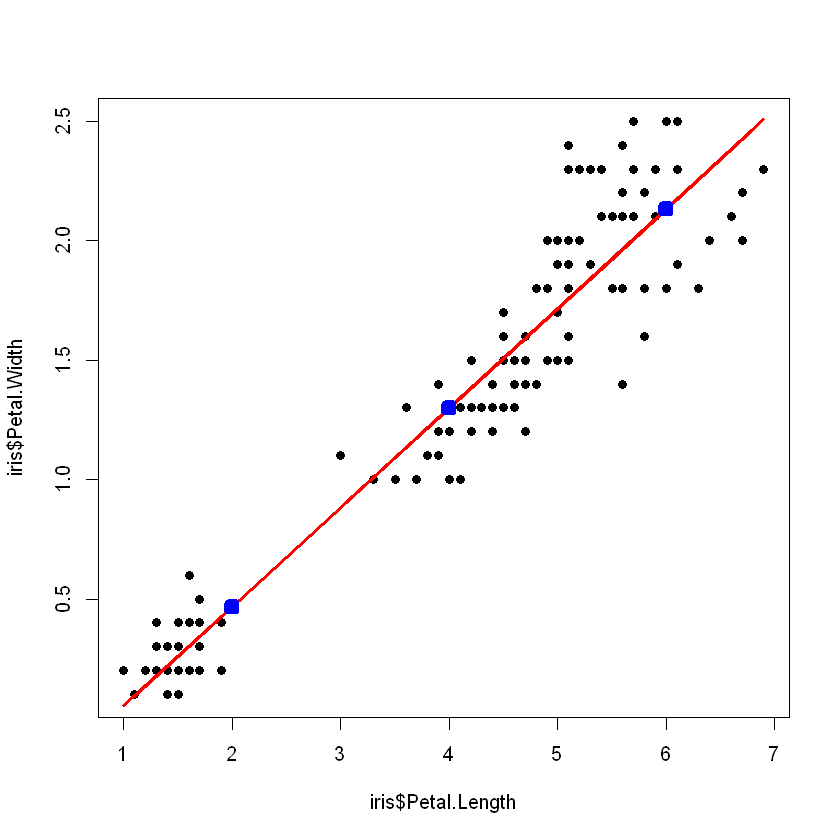

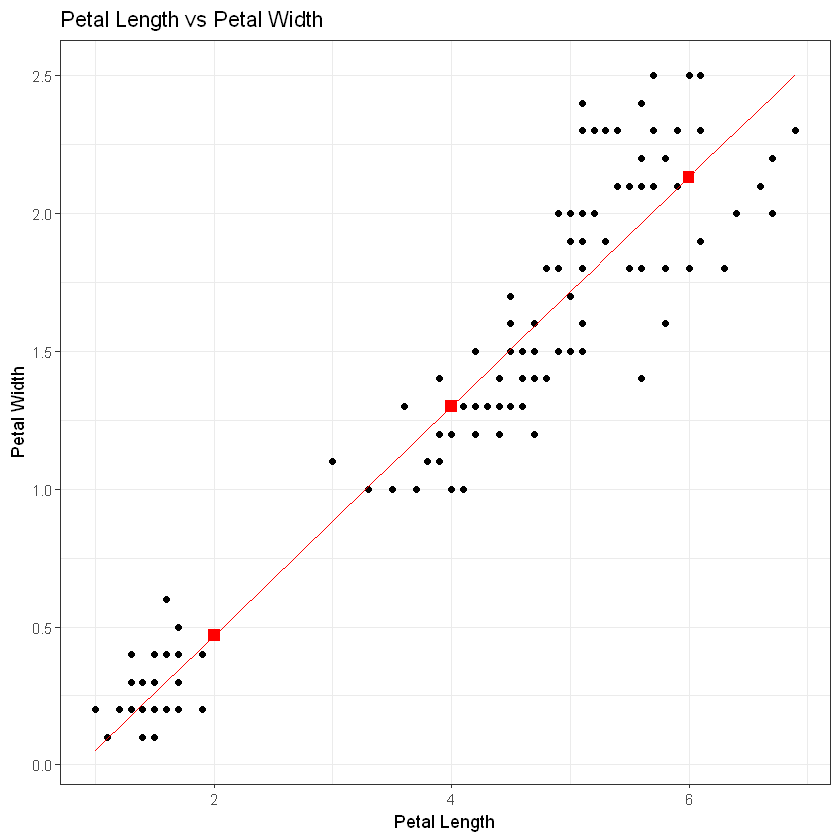

In [11]:
# Predykcja
x_prediction <- c(2,4,6)
y_prediction <- predict( object = model, newdata = data.frame(Petal.Length = x_prediction))

plot(x = iris$Petal.Length, y = iris$Petal.Width, pch = 16)
lines(x = iris$Petal.Length, y = model$fitted, col = "red", lw = 3)
points(x = x_prediction, y = y_prediction, col = "blue", pch = 14, lw = 5)

wykres2 + geom_point(aes(x = x_prediction, y = y_prediction), col = "red", pch=15,size=3)

In [12]:
# Drzewa decyzyjne

set.seed(42)
indexes <- sample(x = 1:150, size = 100)
indexes
length(indexes)
train <- iris[indexes,]
test <- iris[-indexes,]
length(train[,1])
length(test[,1])

library(tree)

[1] 138 140  43 123  94  76 107  20 146 100  65 141 129  35  63 127 132  16
 [19] 136  74 118  18 135 121  11 149  49 112  55 102  89  97  46  81   1  96
 [37] 116  24 128  68  42  48   5 105 130 101  93  66 139 134  34 137  40  77
 [55]   4  72  64 133  25  47  61  88  67  50 131  17  23  69  57 143 115  12
 [73]  85  37 104  54 114  28  38  86  41 126  92  44  52 119  15   6 144  19
 [91]  70  71  13  75 103  60 150  73  39  32

[1] 100

[1] 100

[1] 50

ERROR: Error in library(tree): there is no package called 'tree'


In [13]:
# Tworzymy model

model <- tree(formula = Species ~., data = train)
# symbol kropki działa jak symbol * w SQL
# moglibyśmy napisać Species ~ Petal.Length + Petal.Width + Sepal.Length + Sepal.Width
# Podsumowanie modelu
summary(model)

ERROR: Error in eval(expr, envir, enclos): nie udało się znaleźć funkcji 'tree'


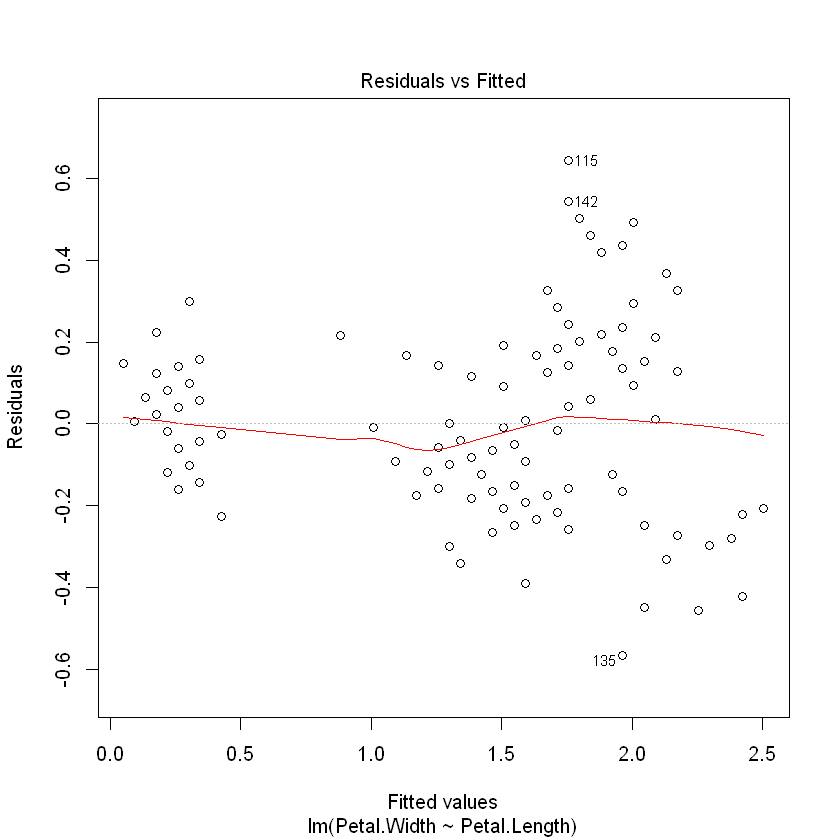

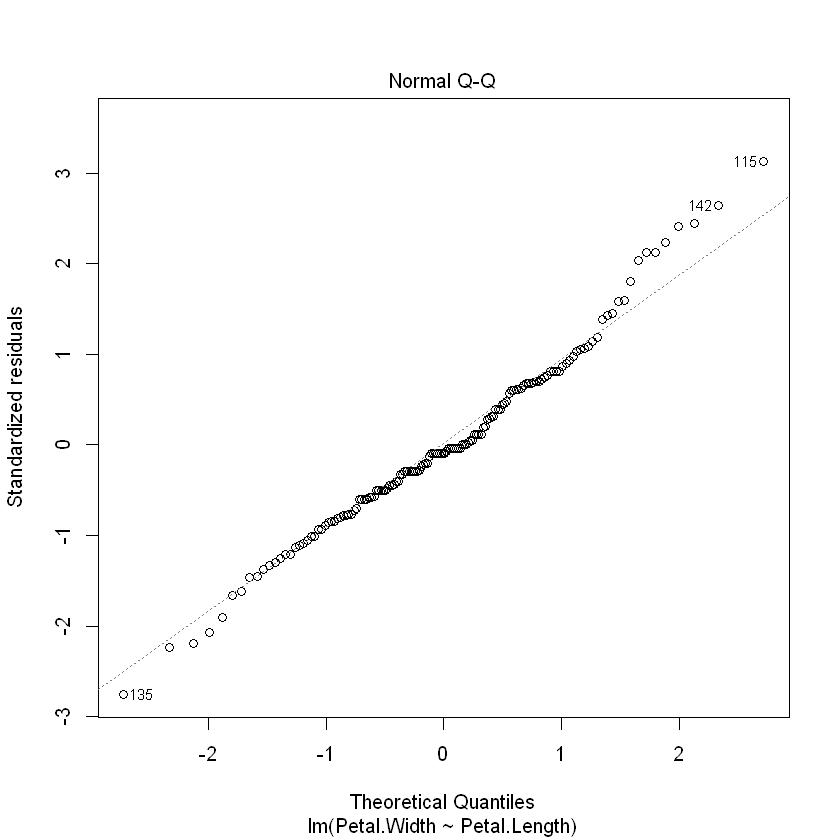

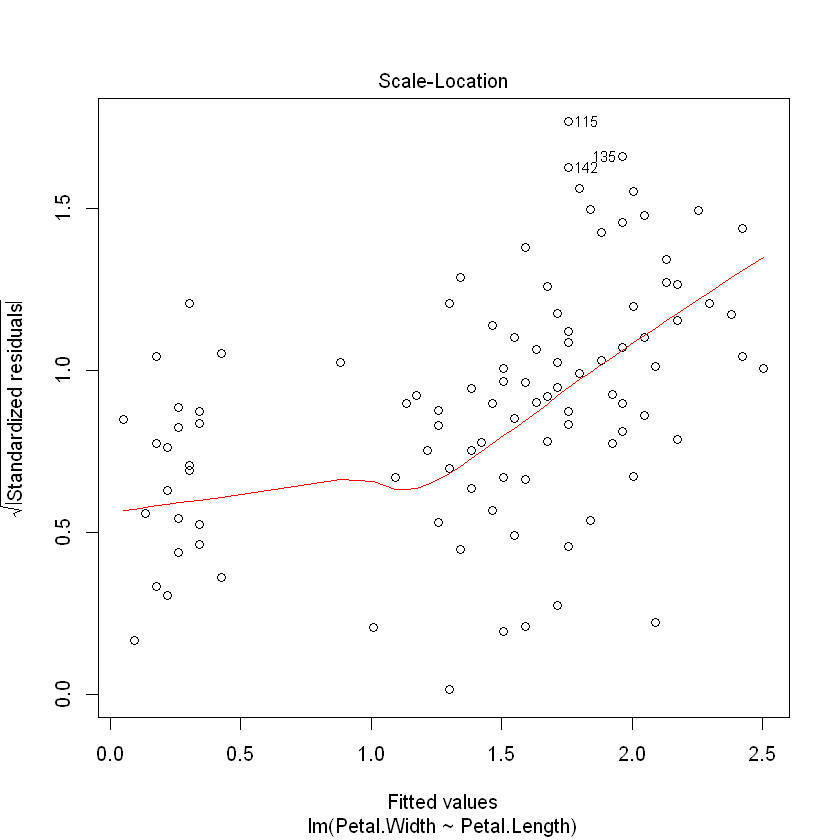

ERROR: Error in xy.coords(x, y, recycle = TRUE): 'x' is a list, but does not have components 'x' and 'y'


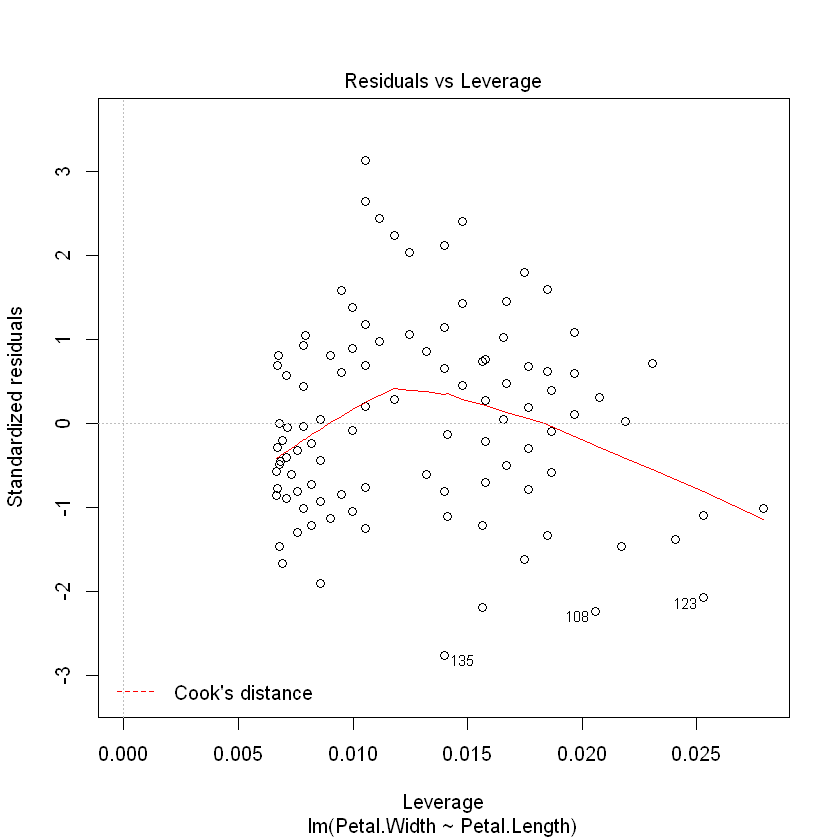

In [14]:
plot(model)
text(model)

# Dane na wykresie
paleta <- brewer.pal(3, "Set2")


p <- ggplot(data = iris, aes(x=iris$Petal.Length, y = iris$Petal.Width, col = iris$Species)) + ggtitle("Petal Length vs Petal Width by Species") + 
  xlab("Petal Length") + ylab("Petal Width") + theme_bw() + geom_point() +
  scale_fill_manual("legend_title",values=x$Species)
p$labels$colour <- "Species"
p

ERROR: Error in plot.xy(xy, type, ...): nie znaleziono obiektu 'paleta'


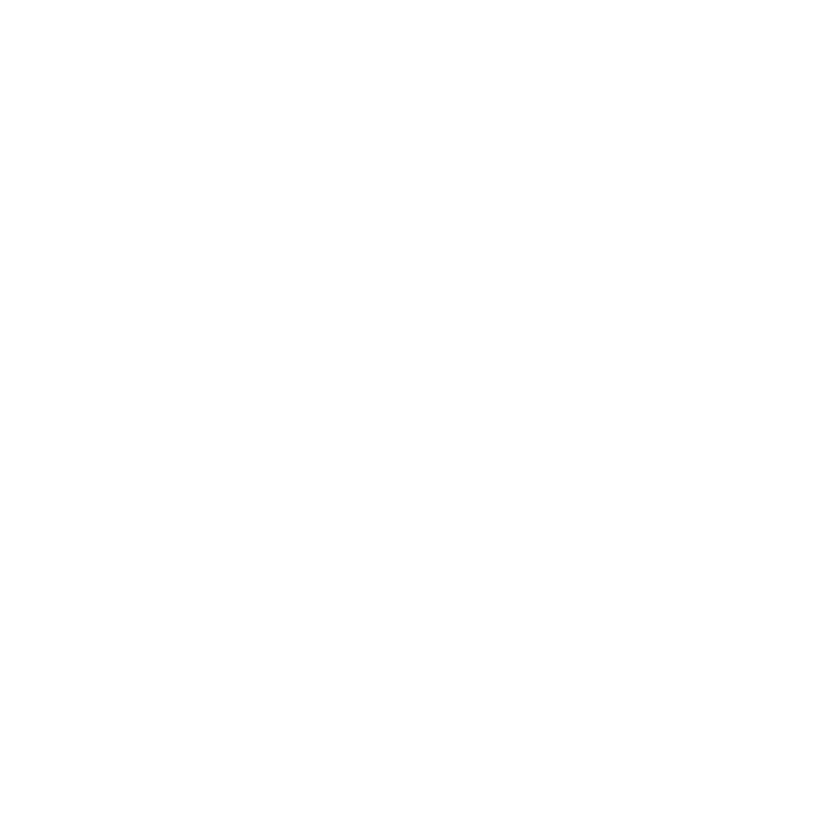

In [15]:
plot ( x = iris$Petal.Length, 
       y = iris$Petal.Width, 
       pch=19, 
       col = paleta[as.numeric(iris$Species)],
       main = "Iris Petal Length vs. Width",
       xlab = "Petal Length",
       ylab = "Petal Width")

In [16]:
# partition.tree może stosować, jeśli drzewo ma 1 lub 2 zmienne pozycyjne
partition.tree(tree = model, label = "Species", add=TRUE)
# zmiana seeda 1 i 42

# Predykcja modelu na danych testowych
predictions <- predict( 
  object = model, 
  newdata = test,
  type= "class") # classification
# confusion matrix
table( 
  x = predictions,
  y = test$Species)


ERROR: Error in eval(expr, envir, enclos): nie udało się znaleźć funkcji 'partition.tree'


In [17]:
library(caret)

confusionMatrix(
  data = predictions,
  reference = test$Species)

Loading required package: lattice


ERROR: Error in confusionMatrix(data = predictions, reference = test$Species): nie znaleziono obiektu 'predictions'


In [18]:
library(randomForest)
r_model <- randomForest(Species~., data = train, ntree = 500)
summary(r_model)

randomForest 4.6-12
Type rfNews() to see new features/changes/bug fixes.

Attaching package: 'randomForest'

The following object is masked from 'package:ggplot2':

    margin



                Length Class  Mode     
call               4   -none- call     
type               1   -none- character
predicted        100   factor numeric  
err.rate        2000   -none- numeric  
confusion         12   -none- numeric  
votes            300   matrix numeric  
oob.times        100   -none- numeric  
classes            3   -none- character
importance         4   -none- numeric  
importanceSD       0   -none- NULL     
localImportance    0   -none- NULL     
proximity          0   -none- NULL     
ntree              1   -none- numeric  
mtry               1   -none- numeric  
forest            14   -none- list     
y                100   factor numeric  
test               0   -none- NULL     
inbag              0   -none- NULL     
terms              3   terms  call     

In [19]:
predictions2 <- predict(object = r_model, newdata = test) 
table(
  x = predictions2,
  y = test$Species
)

            y
x            setosa versicolor virginica
  setosa         17          0         0
  versicolor      0         16         1
  virginica       0          2        14

In [20]:
confusionMatrix(data = predictions2, reference = test$Species)
plot(r_model)
r_model
sum(r_model$confusion[c(1,5,9)])/100

ERROR: Error in requireNamespaceQuietStop("e1071"): package e1071 is required
